# Data Science and Business Analytics (GRIP June 2021)

# Task 5 : Exploratory Data Analysis - Sports

# Author : Paras Nitin Shah

# Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
deliveries.shape

(179078, 21)

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [11]:
matches.city = matches.city.fillna("Dubai")

## Exploratory Data Analysis & Data Visualization

In [12]:
print("Total Number of Seasons Played :", matches['season'].value_counts().nunique())
print("Total Number of Matches Played :", matches.shape[0])

Total Number of Seasons Played : 7
Total Number of Matches Played : 756


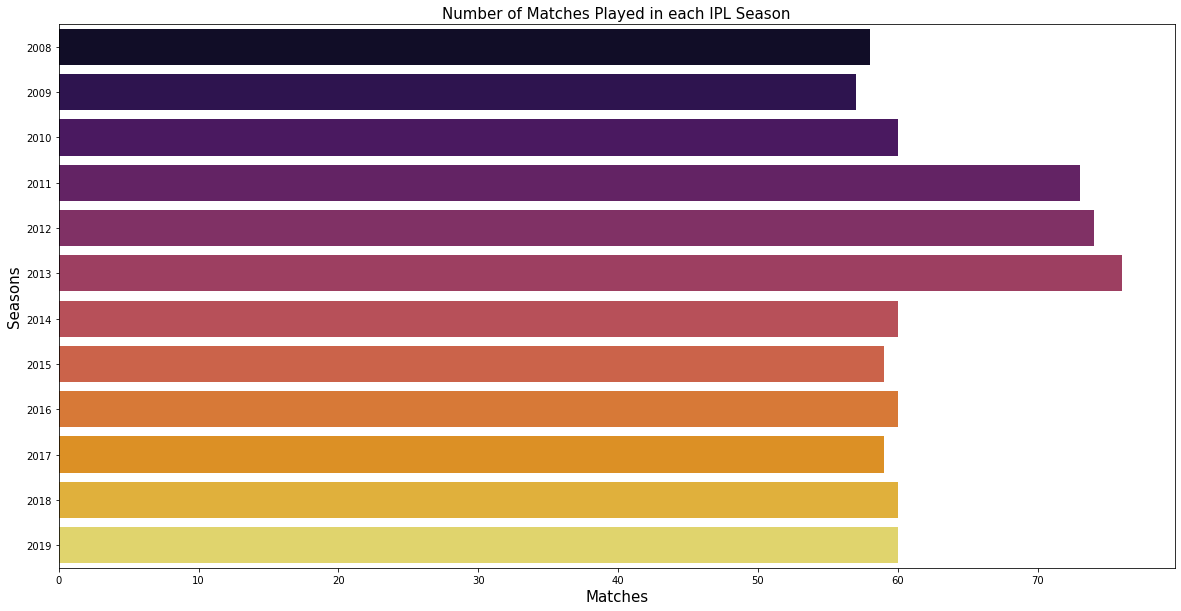

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(y='season', data=matches, palette='inferno')
plt.title("Number of Matches Played in each IPL Season", fontsize=15)
plt.xlabel("Matches", fontsize=15)
plt.ylabel("Seasons", fontsize=15)
plt.show()

In [14]:
season_winner=matches.drop_duplicates(subset=['season'], keep='last')
season_winner[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [15]:
print("Teams with Most IPL Season Wins :\n")
print(season_winner["winner"].value_counts())

Teams with Most IPL Season Wins :

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64


In [16]:
print("Teams with Most Wins in IPL (All Seasons):\n")
print(matches.winner.value_counts())

Teams with Most Wins in IPL (All Seasons):

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


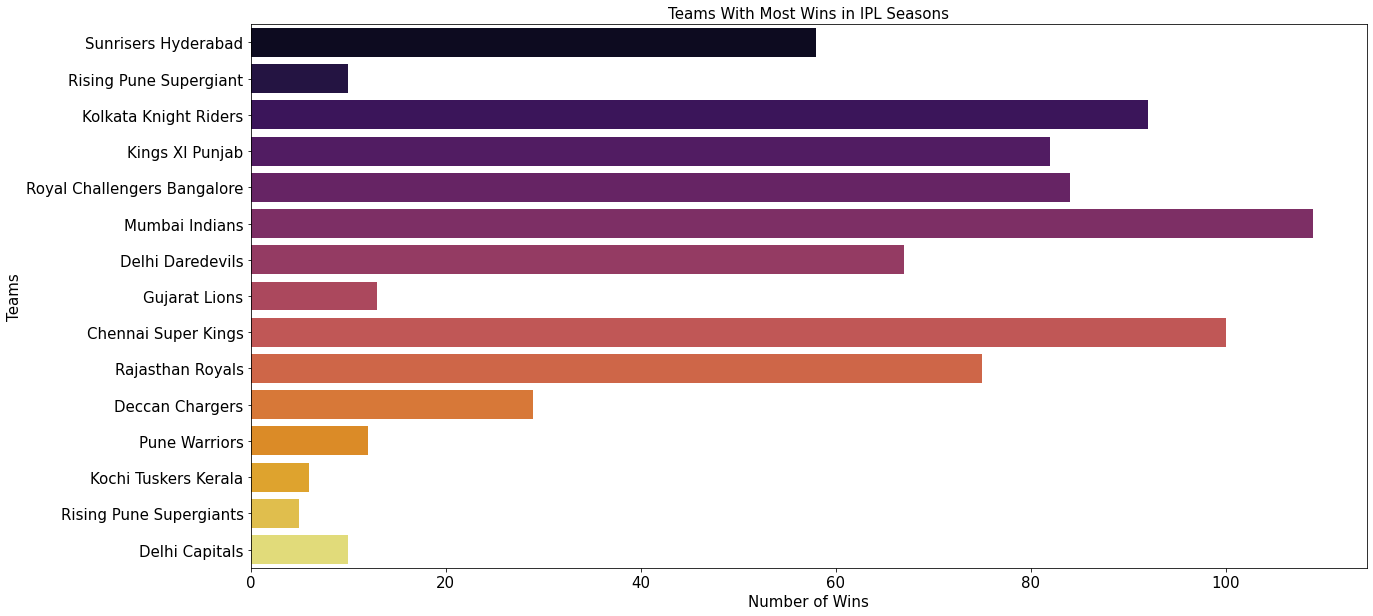

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(y='winner', data=matches, palette='inferno')
plt.title("Teams With Most Wins in IPL Seasons", fontsize=15)
plt.xlabel("Number of Wins", fontsize=15)
plt.xticks(size=15)
plt.ylabel("Teams", fontsize=15)
plt.yticks(size=15)
plt.show()

In [18]:
print("Top 10 Players of All Time :\n")
print(matches['player_of_match'].value_counts()[:10])

Top 10 Players of All Time :

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


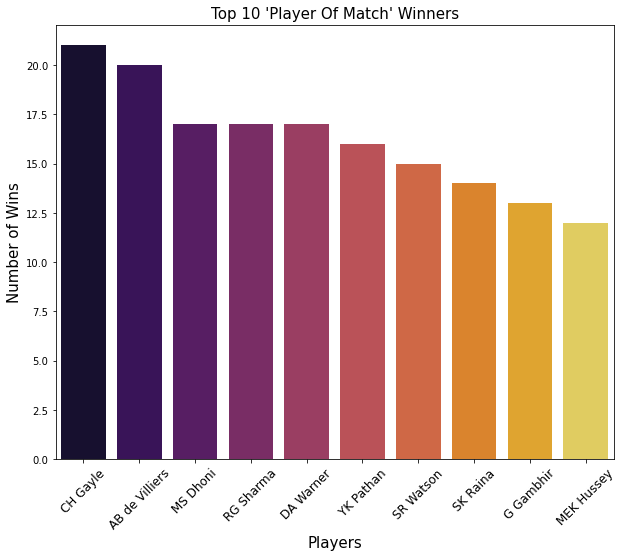

In [19]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
top_players.plot.bar(figsize=(10,8))
sns.barplot(x=top_players.index, y=top_players, orient='v', palette="inferno");
plt.title("Top 10 'Player Of Match' Winners", fontsize=15)
plt.xlabel("Players", fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel("Number of Wins", fontsize=15)
plt.show()

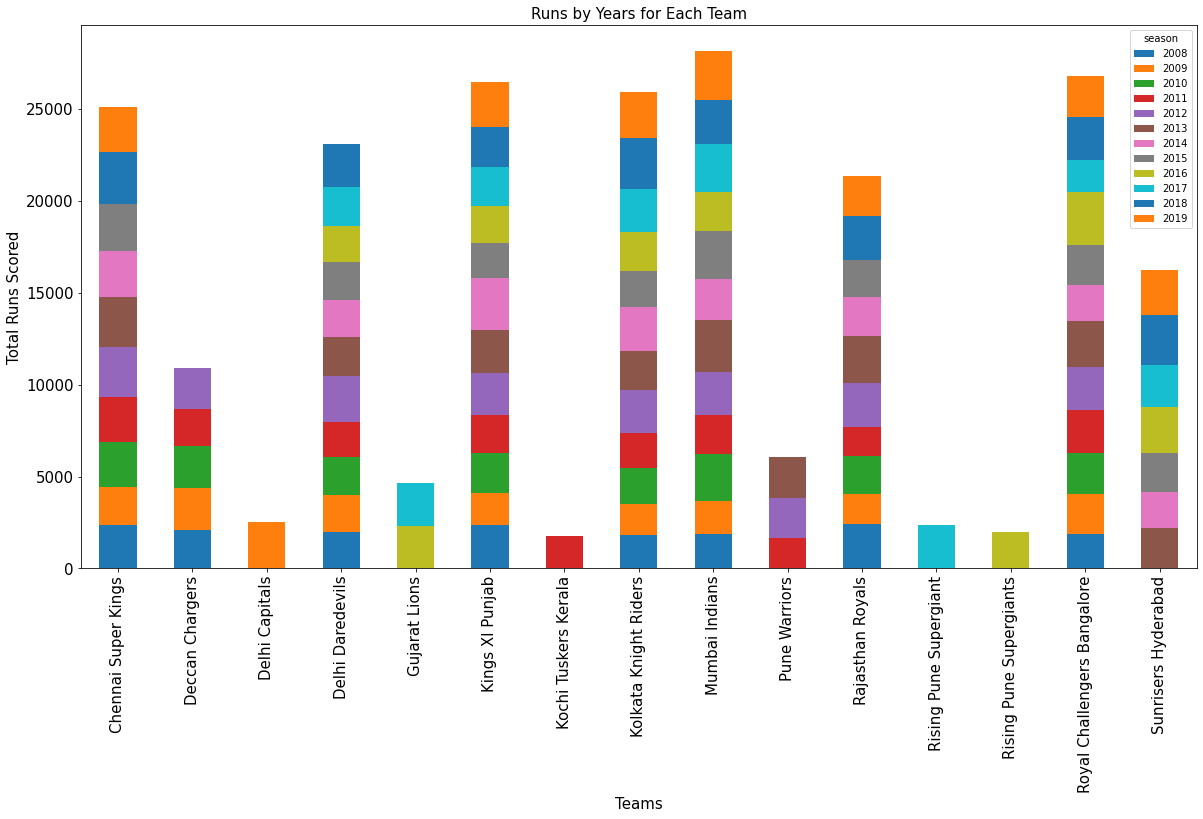

In [20]:
season=matches[['id','season','winner']]
merge=deliveries.merge(season,how='inner',left_on='match_id',right_on='id')
merge.groupby(['batting_team','season'])['batsman_runs'].sum().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Runs by Years for Each Team",fontsize= 15)
plt.xlabel("Teams", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

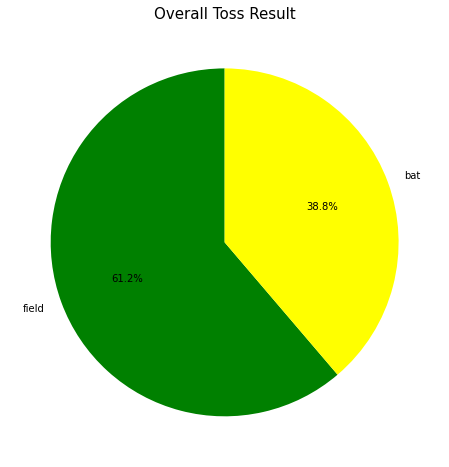

In [21]:
toss=matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['green', 'yellow']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Overall Toss Result',fontsize=15)
plt.show()

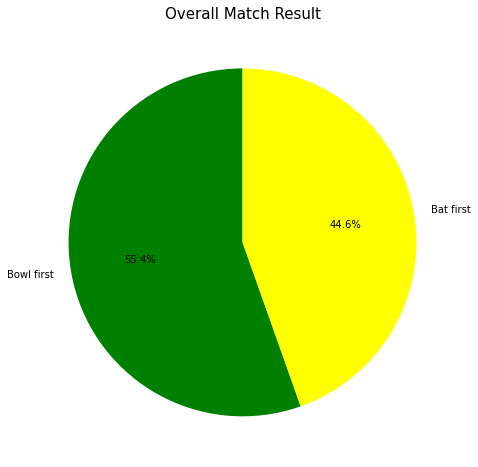

In [22]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
win=matches.win_by.value_counts()
labels=np.array(win.index)
sizes = win.values
colors = ['green','yellow']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.title("Overall Match Result",fontsize=15)
plt.show()

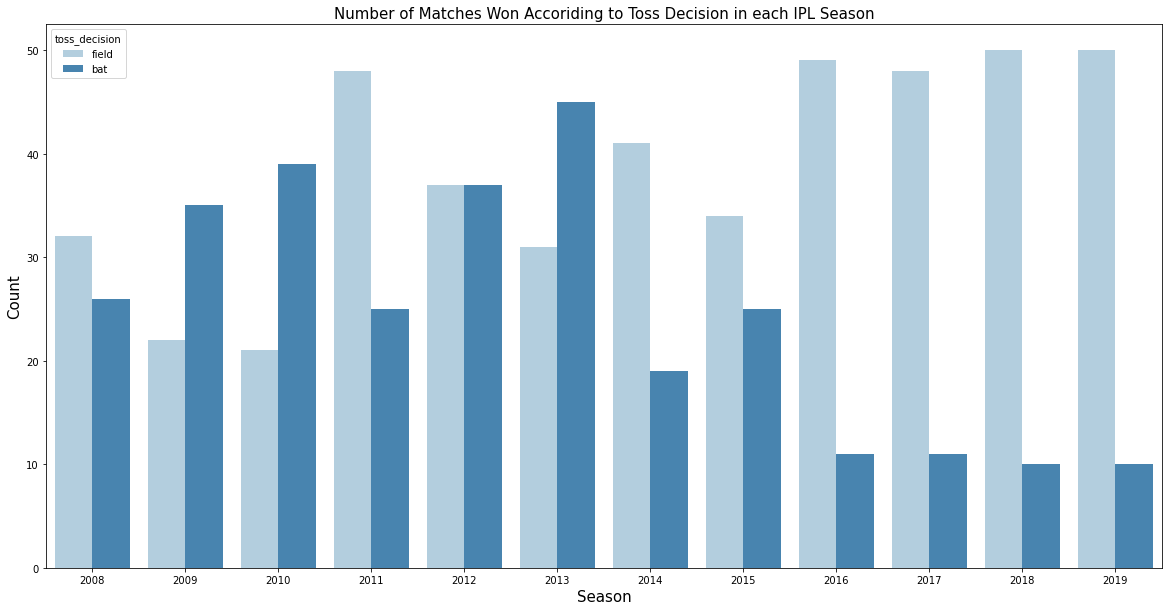

In [23]:
plt.figure(figsize = (20,10))
sns.countplot(x='season', hue='toss_decision', data=matches, palette='Blues')
plt.title("Number of Matches Won Accoriding to Toss Decision in each IPL Season", fontsize=15)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [24]:
batsman_score = deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
batsman_score = batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Run Scorers in IPL")
batsman_score.iloc[:10,:]

Top 10 Run Scorers in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


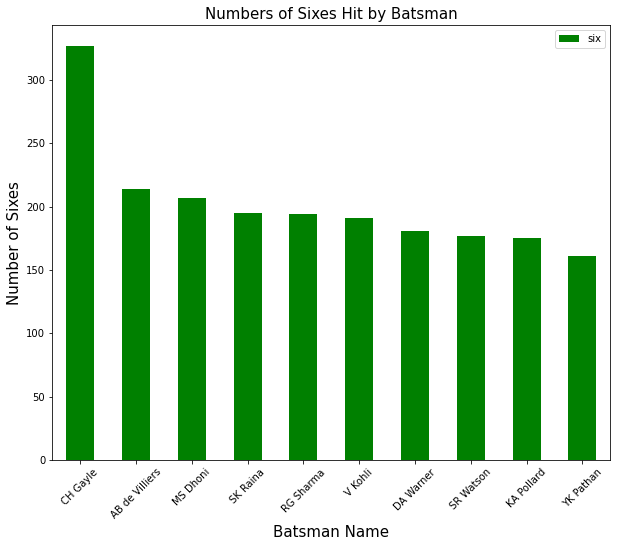

In [25]:
sixes=merge[merge['batsman_runs']==6]
sixes.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])
six_player = sixes.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=six_player.iloc[:10,:].plot('batsman','six',kind='bar',color='green', figsize=(10,8))
plt.title("Numbers of Sixes Hit by Batsman",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

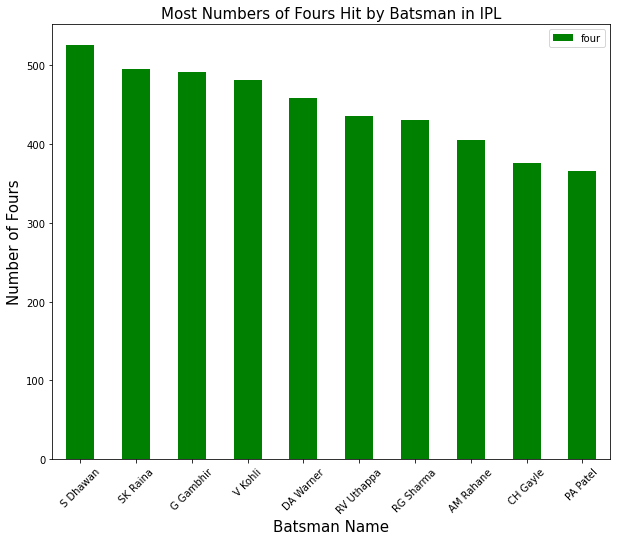

In [26]:
fours=merge[merge['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by four','sum'),('gours','count')])
four_player = fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=four_player.iloc[:10,:].plot('batsman','four',kind='bar',color='green', figsize=(10,8))
plt.title("Most Numbers of Fours Hit by Batsman in IPL",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Fours",fontsize=15)
plt.show()

In [27]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
print("Top 10 Wicket Takers in IPL")
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',
        ascending=False).reset_index(drop=True).iloc[:10,:]

Top 10 Wicket Takers in IPL


,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Analysis Report

### 01. Total Number of Seasons Played = 7
### 02. Total Number of Matches Played = 756
### 03. Year with the most matches in an IPL Season = 2013
### 04. Team with the most IPL Season wins = Mumbai Indians (4 Wins)
### 05. Team with the most match wins in IPL (All Seasons) = Mumbai Indians (109 Wins)
### 06. Top Player of entire IPL based on most 'Player of the Match' wins = CH Gayle 
### 07. Team with the most runs in IPL (All Seasons) = Mumbai Indians
### 08. Overall Toss Result = 61.2% Bowl First, 38.8% Bat First
### 09. Overall Match Result based on action = 55.4% Bowl First, 44.6% Bat First
### 10. Top Run Scorer in IPL = V Kohli (5434 runs)
### 11. Batsman with Most Fours in IPL = S Dhawan
### 12. Batsman with Most Sixes in IPL =  CH Gayle
### 13. Top Wicket Taker in IPL = SL Malinga